In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%matplotlib notebook

State-space reduction: 4->1


<AxesSubplot:xlabel='$\\nu$ / MHz', ylabel='I / a.u.'>

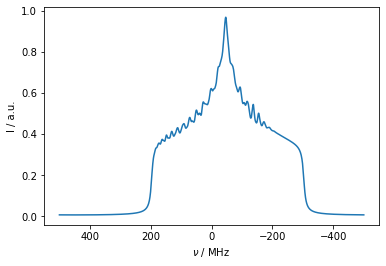

In [23]:
ex=sl.ExpSys(v0H=200,Nucs='e-',vr=0,T_K=80,pwdavg=sl.PowderAvg('zcw4180'))
ex.set_inter('g',i=0,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,0,0])

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=400e-9)
L.add_relax('T1',i=0,T1=500e-6)

seq=L.Sequence(Dt=1e-9)
rho=sl.Rho('ex','ep')
rho.DetProp(seq,n=1024)
rho.apod_pars['LB']=10e6
rho.plot(FT=True,apodize=True,axis='MHz')

State-space reduction: 64->64


<IPython.core.display.Javascript object>


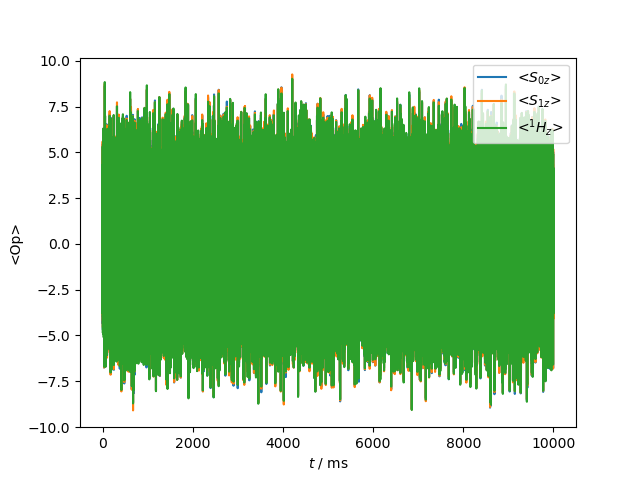

<AxesSubplot:xlabel='$t$ / ms', ylabel='<Op>'>

In [41]:
ex=sl.ExpSys(v0H=250,Nucs=['e-','e-','1H'],LF=[False,False,True],vr=5000,T_K=80,pwdavg=sl.PowderAvg(q=2))
ex.set_inter('hyperfine',i0=0,i1=2,Axx=-1000000,Ayy=-1000000,Azz=2000000,euler=[0,np.pi/3,np.pi/4])
ex.set_inter('g',i=0,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,0,0])
ex.set_inter('g',i=1,gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0,np.pi/4,0])
ex.set_inter('dipole',i0=0,i1=1,delta=sl.Tools.dipole_coupling(1.33,'e-','e-'),euler=[0,77*np.pi/180,0])

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=400e-9)
L.add_relax('T2',i=1,T2=400e-9)
L.add_relax('T1',i=0,T1=25e-6)
L.add_relax('T1',i=1,T1=25e-6)
L.add_relax('T2',i=2,T2=5e-3)
L.add_relax('T1',i=2,T1=3)
L.add_relax('recovery')

seq=L.Sequence().add_channel('e',v1=3e5,voff=-250e-6)

rho=sl.Rho('zero',['S0z','S1z','1Hz'])
rho.DetProp(seq,n=50000)
rho.plot(axis='s')

In [42]:
ex

3-spin system (e-,e-,1H)
B0 = 5.872 T (250.000 MHz 1H frequency)
rotor angle = 54.736 degrees
rotor frequency = 5.0 kHz
Temperature = 80 K
Powder Average: JCP59 with 49 angles
Interactions:
	hyperfine between spins 0,2 with arguments:
		(Axx=-1000000,Ayy=-1000000,Azz=2000000,euler=[0.00,60.00,45.00])
	g on spin 0 with arguments: (gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0.00,0.00,0.00])
	g on spin 1 with arguments: (gxx=2.0022,gyy=2.0059,gzz=2.0098,euler=[0.00,45.00,0.00])
	dipole between spins 0,1 with arguments:
		(delta=44240574.93343551,euler=[0.00,77.00,0.00])


<IPython.core.display.Javascript object>


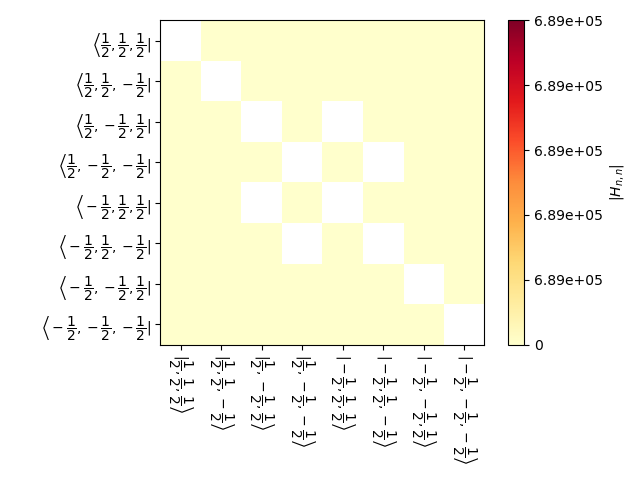

/Users/albertsmith/Documents/GitHub/SLEEPY/HamTypes.py:218: RuntimeWarning: invalid value encountered in true_divide
  x[i]/=sc1


<AxesSubplot:>

In [46]:
L[0].H[0].Hinter[3].plot()